<a href="https://colab.research.google.com/github/hoonzi-s/APC/blob/main/%231%20ALK%20-%20213BTMRVP%20Inferential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
data = pd.read_csv('alk rvp csv.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2630 non-null   object 
 1   RVP_LAB         2630 non-null   float64
 2   S.B5.213TI2804  2630 non-null   float64
 3   S.B5.213PI2806  2630 non-null   float64
dtypes: float64(3), object(1)
memory usage: 82.3+ KB


In [101]:
data.describe()

,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
count,2630.000000,2630.000000,2630.000000
mean,39.231825,134.057135,334.780819
std,3.370950,3.297289,28.795557
min,28.500000,105.853689,292.973607
25%,37.400000,132.072018,318.666130
50%,38.900000,133.457330,325.533775
75%,40.600000,136.072316,338.502085
max,98.600000,144.626507,485.531928


In [102]:
data

,Unnamed: 0,RVP_LAB,S.B5.213TI2804,S.B5.213PI2806
0,2014-09-16,35.5,137.368850,332.370196
1,2014-09-17,33.5,138.363550,342.267734
2,2014-09-18,34.4,138.571868,339.821023
3,2014-09-19,34.3,137.795705,333.793957
4,2014-09-20,35.2,137.670243,343.080718
...,...,...,...,...
2625,2022-02-24,44.4,128.563951,330.977679
2626,2022-02-25,39.5,129.419033,319.675153
2627,2022-02-26,42.2,128.297302,323.319369
2628,2022-02-27,44.5,126.842403,328.328110


In [109]:
data.columns = ['DATE', 'RVP_LAB', 'TI2804', 'PI2806']
data = data[data['RVP_LAB'] < 60]
data

,DATE,RVP_LAB,TI2804,PI2806
0,2014-09-16,35.5,137.368850,332.370196
1,2014-09-17,33.5,138.363550,342.267734
2,2014-09-18,34.4,138.571868,339.821023
3,2014-09-19,34.3,137.795705,333.793957
4,2014-09-20,35.2,137.670243,343.080718
...,...,...,...,...
2625,2022-02-24,44.4,128.563951,330.977679
2626,2022-02-25,39.5,129.419033,319.675153
2627,2022-02-26,42.2,128.297302,323.319369
2628,2022-02-27,44.5,126.842403,328.328110


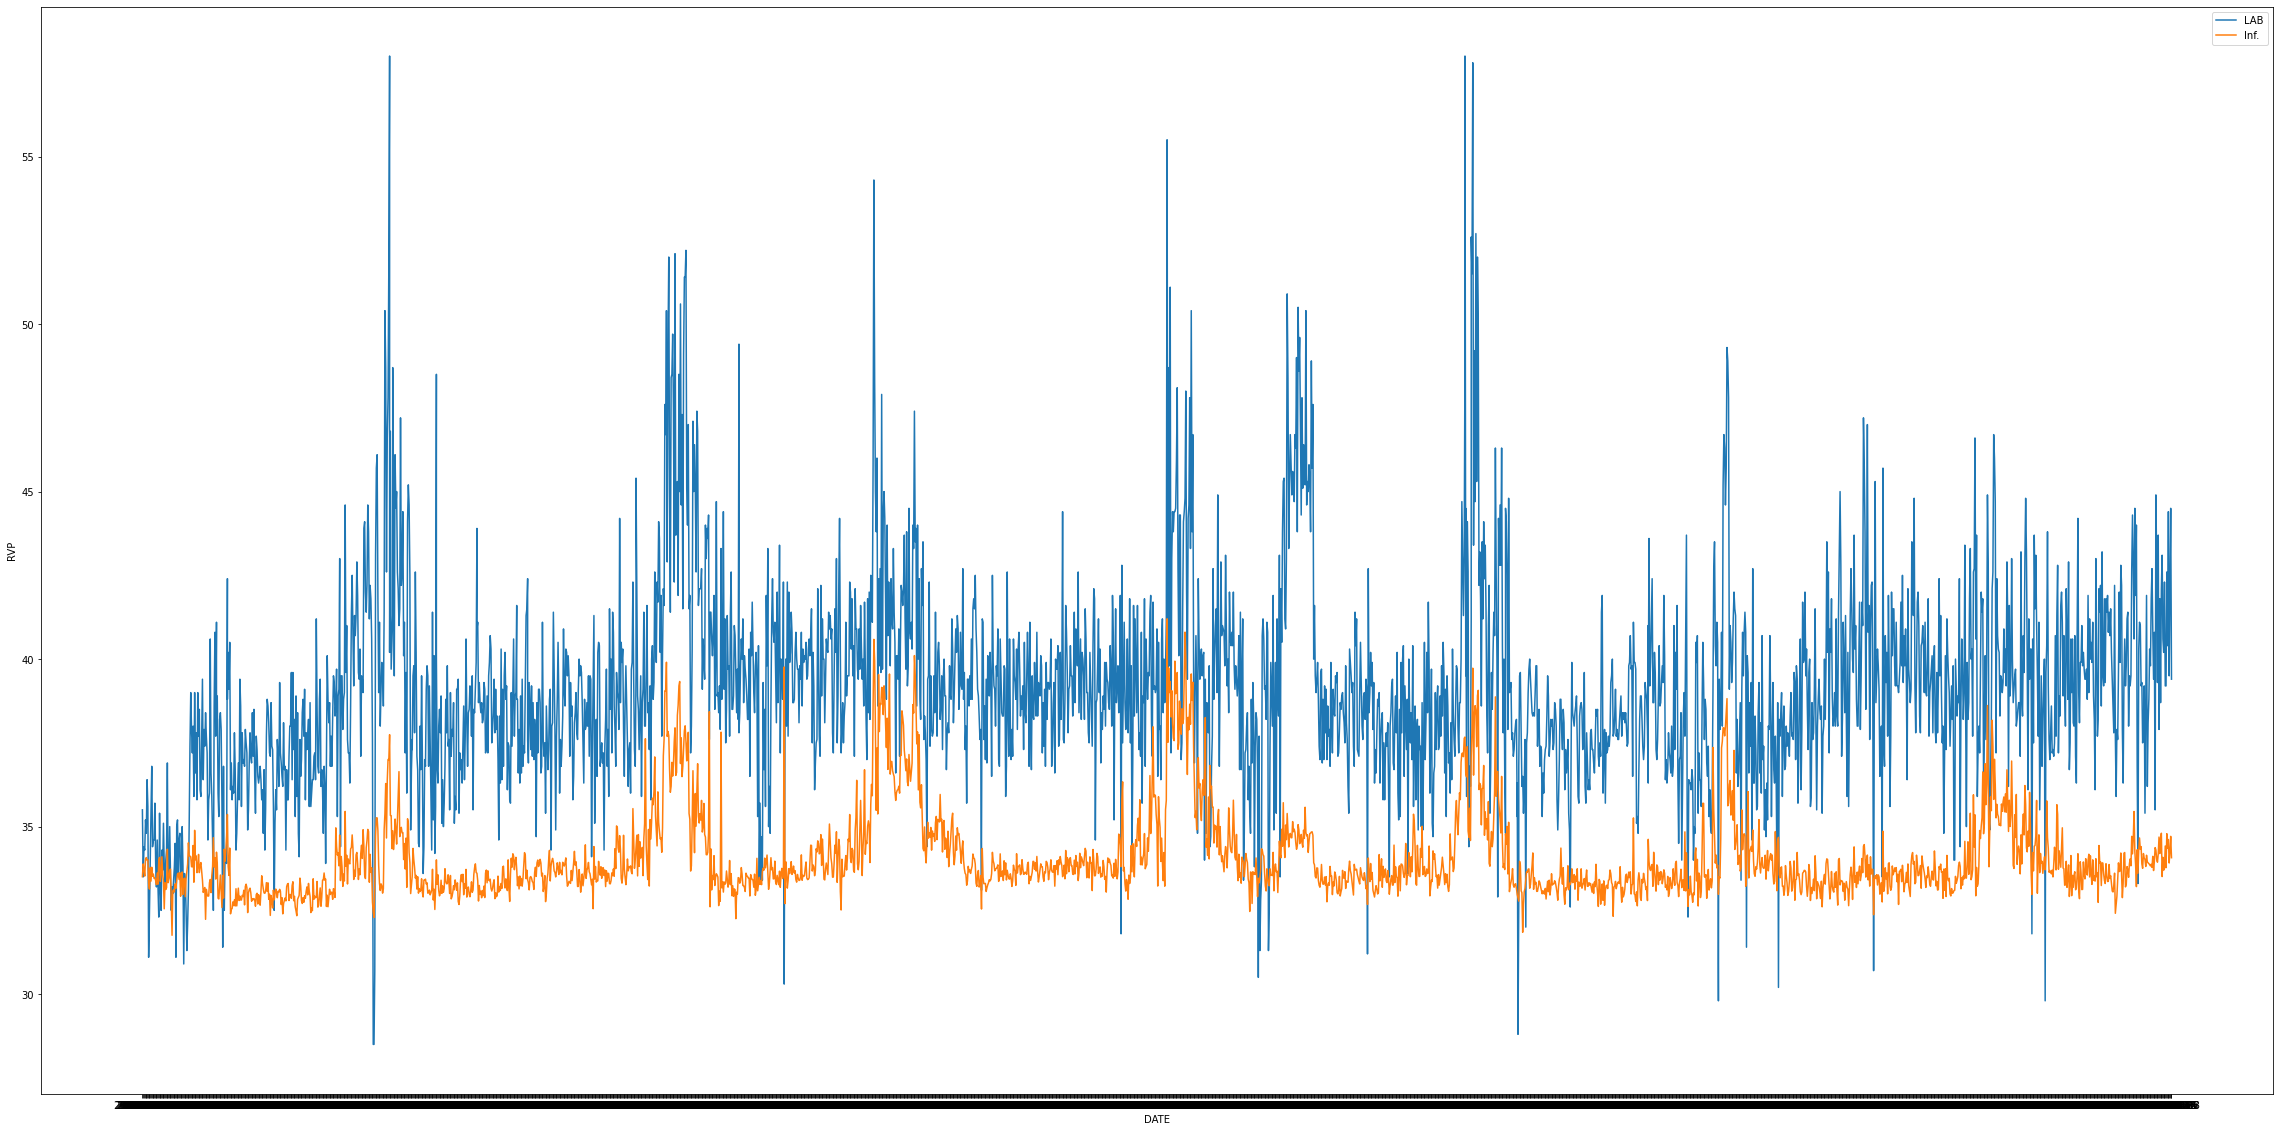

In [110]:
plt.figure(figsize = (40, 20))
plt.plot(data['DATE'], data['RVP_LAB'], label = 'LAB')
plt.plot(data['DATE'], -0.1343 * data['TI2804'] + 0.0520 * data['PI2806'] + 34.671, label = 'Inf.')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [111]:
input = data[['DATE', 'TI2804', 'PI2806']]
input

,DATE,TI2804,PI2806
0,2014-09-16,137.368850,332.370196
1,2014-09-17,138.363550,342.267734
2,2014-09-18,138.571868,339.821023
3,2014-09-19,137.795705,333.793957
4,2014-09-20,137.670243,343.080718
...,...,...,...
2625,2022-02-24,128.563951,330.977679
2626,2022-02-25,129.419033,319.675153
2627,2022-02-26,128.297302,323.319369
2628,2022-02-27,126.842403,328.328110


In [112]:
target = data[['DATE', 'RVP_LAB']]
target

,DATE,RVP_LAB
0,2014-09-16,35.5
1,2014-09-17,33.5
2,2014-09-18,34.4
3,2014-09-19,34.3
4,2014-09-20,35.2
...,...,...
2625,2022-02-24,44.4
2626,2022-02-25,39.5
2627,2022-02-26,42.2
2628,2022-02-27,44.5


In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [131]:
train_input_with_date, test_input_with_date, train_target_with_date, test_target_with_date = tts(input, target, test_size = 0.2)
train_input = train_input_with_date[['TI2804', 'PI2806']]
test_input = test_input_with_date[['TI2804', 'PI2806']]
train_target = train_target_with_date['RVP_LAB']
test_target = test_target_with_date['RVP_LAB']
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.4494843289046804
0.4892182512933372


In [132]:
print(lr.coef_)
print(lr.intercept_)

[-0.58023628  0.08864726]
87.32640545435018


In [133]:
a1 = lr.coef_[0]
a2 = lr.coef_[1]
b = lr.intercept_
result = a1 * train_input['TI2804'] + a2 * train_input['PI2806'] + b
result.sort_index()

1       37.383952
2       37.046184
5       38.076656
6       38.475608
7       38.403483
          ...    
2625    42.069202
2626    40.571114
2627    41.545034
2628    42.833230
2629    40.769900
Length: 2102, dtype: float64

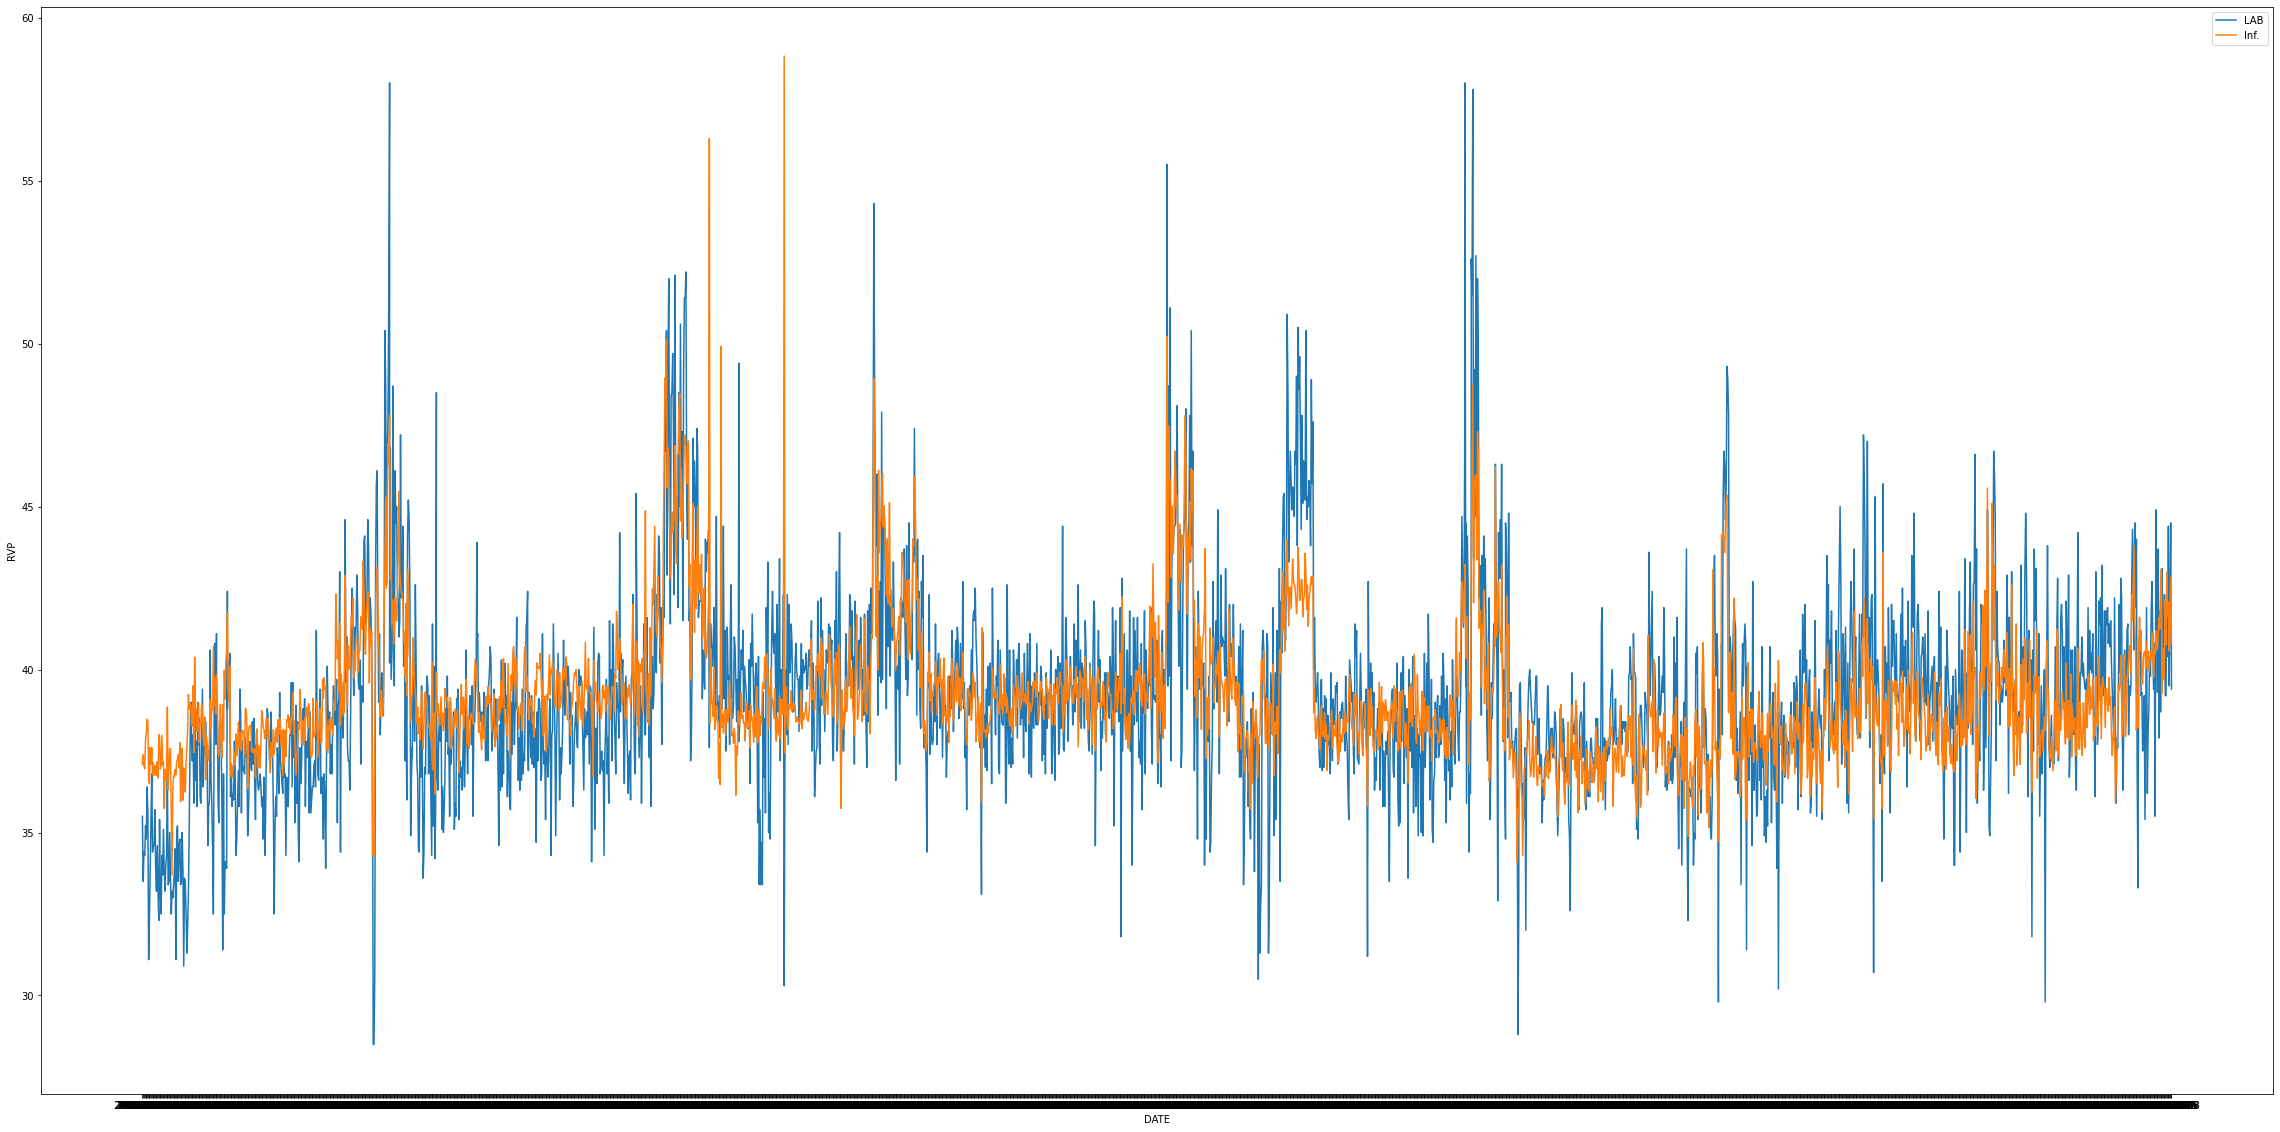

In [139]:
plt.figure(figsize = (40, 20))
plt.plot(data['DATE'], data['RVP_LAB'], label = 'LAB')
plt.plot(data['DATE'], a1 * data['TI2804'] + a2 * data['PI2806'] + b, label = 'Inf.')
plt.xlabel('DATE')
plt.ylabel('RVP')
plt.legend()
plt.show()

In [128]:
train_input_with_date.sort_index()

,DATE,TI2804,PI2806
0,2014-09-16,137.368850,332.370196
1,2014-09-17,138.363550,342.267734
2,2014-09-18,138.571868,339.821023
3,2014-09-19,137.795705,333.793957
4,2014-09-20,137.670243,343.080718
...,...,...,...
2625,2022-02-24,128.563951,330.977679
2626,2022-02-25,129.419033,319.675153
2627,2022-02-26,128.297302,323.319369
2628,2022-02-27,126.842403,328.328110


In [98]:
test_input_with_date

,DATE,TI2804,PI2806
1989,2020-06-01,133.814591,323.861023
1580,2019-03-21,133.720352,327.538269
1634,2019-05-14,136.740265,334.737457
1555,2019-02-24,133.750427,315.113342
2230,2021-01-26,131.857605,323.118378
...,...,...,...
2112,2020-09-30,137.672119,341.812988
1662,2019-06-11,133.121124,323.577728
1240,2018-04-15,133.259674,339.147919
858,2017-03-24,133.008194,319.217682
